In [24]:
import pandas as pd

crime = pd.read_csv("crime.csv")

crime.head()

neigh = crime.groupby('INCIDENTNEIGHBORHOOD').count()
neigh['count'] = neigh['_id']

n = neigh['count'].sort_values(ascending=True)
n.head(50)

INCIDENTNEIGHBORHOOD
Mt. Oliver Neighborhood          2
Troy Hill-Herrs Island           6
Mt. Oliver Boro                 18
Central Northside               23
Regent Square                   36
Ridgemont                       37
New Homestead                   39
Swisshelm Park                  42
Chartiers City                  44
East Carnegie                   48
St. Clair                       53
Outside County                  55
Outside State                   64
Summer Hill                     74
Oakwood                         80
Golden Triangle/Civic Arena     83
Hays                           117
Fairywood                      121
Mount Oliver                   122
Windgap                        123
Allegheny West                 127
Arlington Heights              153
Polish Hill                    162
Glen Hazel                     164
Friendship                     168
Morningside                    185
Duquesne Heights               187
Upper Lawrenceville            187

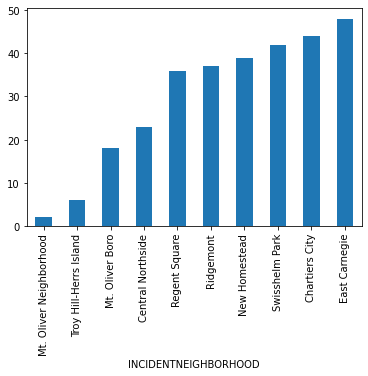

In [2]:
n.head(10).plot.bar()

In [22]:

pop = pd.read_csv("populations.csv")
new_data = pd.merge(n, pop, on="INCIDENTNEIGHBORHOOD")

new_data["count"] = new_data["count"].astype(int) #converting data cause i need to do math
new_data["Pop"] = new_data["Pop"].astype(int) 
new_data["rate"] = new_data["count"] / new_data["Pop"] #math

filtered_data = new_data[new_data["Pop"] > 500] #exclude neighborhoods with population < 500 because they don't matter

percentage_data = filtered_data[["INCIDENTNEIGHBORHOOD", "rate"]]
print(percentage_data.head(10))
percentage_data = percentage_data.sort_values(by=["rate"], ascending=True)
#new_data.head()
#display(new_data)
#new_data.to_string()
new_data.to_csv("out.csv")
filtered_data.to_csv("out2.csv")
percentage_data.to_csv("out3.csv")

#this is stupid i hate this i hate everything 

   INCIDENTNEIGHBORHOOD      rate
0     Central Northside  0.007708
1         Regent Square  0.020560
2             Ridgemont  0.053161
3        Swisshelm Park  0.024706
5         East Carnegie  0.068670
7           Summer Hill  0.052594
8               Oakwood  0.052666
9                  Hays  0.068341
10            Fairywood  0.059871
11              Windgap  0.077652


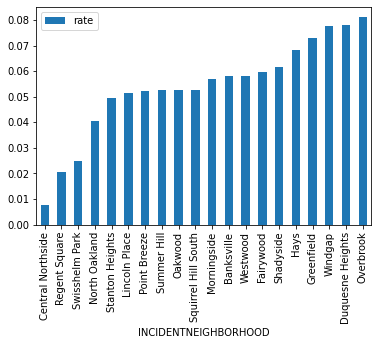

In [21]:
#new_data = new_data.groupby('INCIDENTNEIGHBORHOOD')
percentage_data.head(20).plot.bar(x="INCIDENTNEIGHBORHOOD")